Comenzamos con la importación de las librerías necesarias:

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

%matplotlib inline
sns.set_theme()

# Conjunto de datos

## Carga de datos desde archivo
Los datos se presentan como un único archivo csv separado por comas. Nos quedamos únicamente los datos de carga.

In [ ]:
df = pd.read_excel('dataset.xlsx')
df = df[df["State"] == 1]
df.head()

,I,V,State,T1,T2,SOC
1065,32.031769,3.025864,1,40.83949,39.43654,0.121334
1066,31.999512,3.056382,1,40.81574,39.41282,0.242546
1067,32.001816,3.070420,1,40.81574,39.43654,0.363766
1068,31.997208,3.083238,1,40.80386,39.46027,0.484969
1069,32.001816,3.093309,1,40.76825,39.42468,0.606189


## Información general del conjunto de datos
El subconjunto de carga contiene un total de 6619 observaciones.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6619 entries, 1065 to 15178
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   I       6619 non-null   float64
 1   V       6619 non-null   float64
 2   State   6619 non-null   int64  
 3   T1      6619 non-null   float64
 4   T2      6619 non-null   float64
 5   SOC     6619 non-null   float64
dtypes: float64(5), int64(1)
memory usage: 362.0 KB


## Medidas de tendencia central y variabilidad

In [ ]:
df.describe()

,I,V,State,T1,T2,SOC
count,6619.000000,6619.000000,6619.0,6619.000000,6619.000000,6619.000000
mean,31.998972,3.420082,1.0,39.822529,38.506260,50.060547
std,0.002407,0.088425,0.0,0.547390,0.532051,28.869627
min,31.992599,2.978866,1.0,39.070310,37.704630,0.120893
25%,31.997208,3.384146,1.0,39.343400,38.048640,25.061006
50%,31.999512,3.435416,1.0,39.675870,38.368920,50.060650
75%,31.999512,3.464714,1.0,40.233930,38.926460,75.060565
max,32.050202,3.649958,1.0,41.302560,39.804280,100.000000


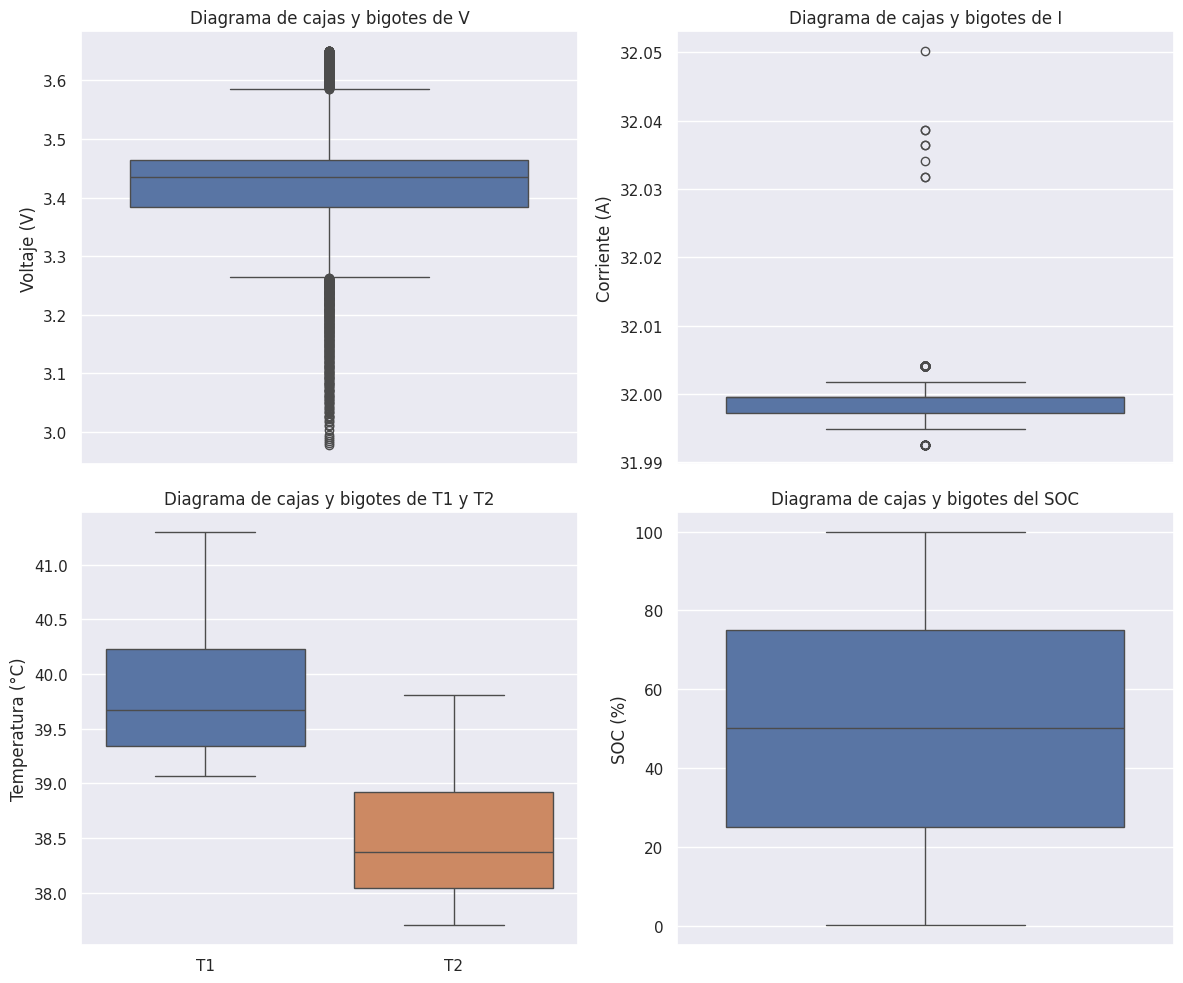

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

sns.boxplot(ax=axes[0, 0], y=df['V'])
axes[0, 0].set_ylabel("Voltaje (V)")
axes[0, 0].set_title('Diagrama de cajas y bigotes de V')

sns.boxplot(ax=axes[0, 1], y=df['I'])
axes[0, 1].set_ylabel("Corriente (A)")
axes[0, 1].set_title('Diagrama de cajas y bigotes de I')

sns.boxplot(ax=axes[1, 0], data=df[['T1', 'T2']])
axes[1, 0].set_ylabel("Temperatura (°C)")
axes[1, 0].set_title('Diagrama de cajas y bigotes de T1 y T2')

sns.boxplot(ax=axes[1, 1], y=df['SOC'])
axes[1, 1].set_ylabel("SOC (%)")
axes[1, 1].set_title('Diagrama de cajas y bigotes del SOC')

plt.tight_layout()
plt.show()

# Visualización de los datos

##Análisis de una variable


###Corriente

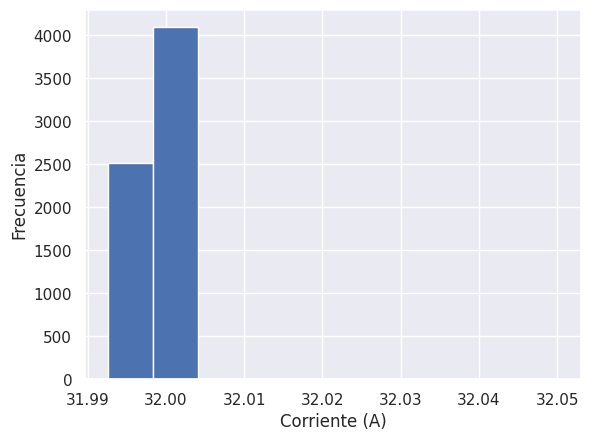

In [ ]:
plt.hist(df["I"])

plt.xlabel("Corriente (A)")
plt.ylabel("Frecuencia")
plt.show()

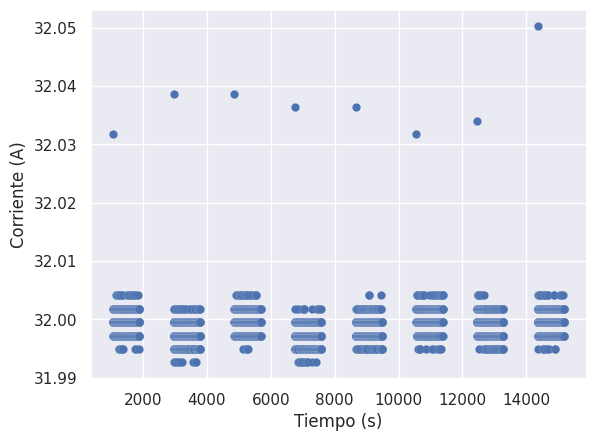

In [ ]:
sns.scatterplot(x=df.index, y=df["I"], linewidth=0.05)
plt.xlabel("Tiempo (s)")
plt.ylabel("Corriente (A)")
plt.show()

###Tensión

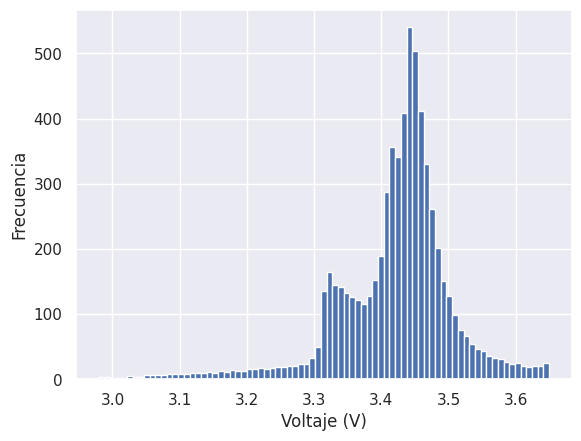

In [ ]:
plt.hist(df["V"], bins="auto")
plt.xlabel("Voltaje (V)")
plt.ylabel("Frecuencia")
plt.show()

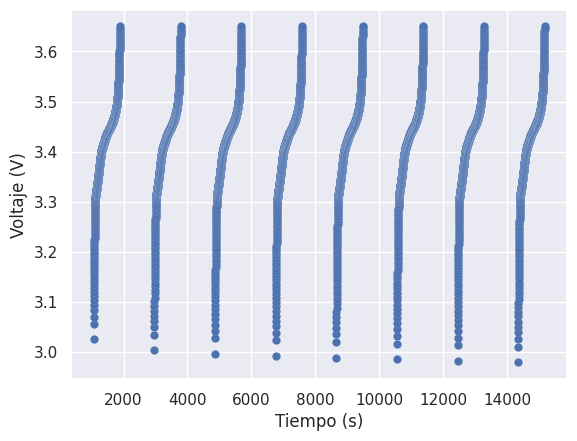

In [ ]:
sns.scatterplot(x=df.index, y=df["V"], linewidth=0.05)
plt.xlabel("Tiempo (s)")
plt.ylabel("Voltaje (V)")
plt.show()

###Temperatura

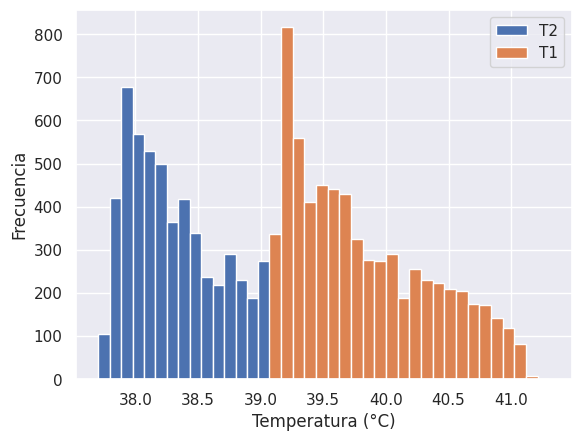

In [ ]:
plt.hist(df["T2"], bins="auto")
plt.hist(df["T1"], bins="auto")
plt.xlabel("Temperatura (°C)")
plt.ylabel("Frecuencia")
plt.legend(["T2", "T1"])
plt.show()

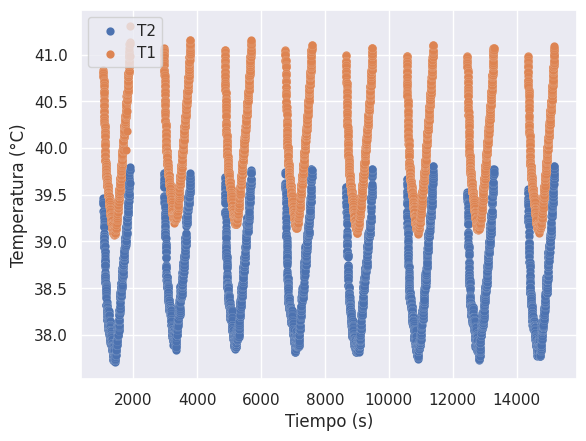

In [ ]:
sns.scatterplot(x=df.index, y=df["T2"], linewidth=0.05, label="T2")
sns.scatterplot(x=df.index, y=df["T1"], linewidth=0.05, label="T1")
plt.xlabel("Tiempo (s)")
plt.ylabel("Temperatura (°C)")
plt.legend()
plt.show()

###Estado

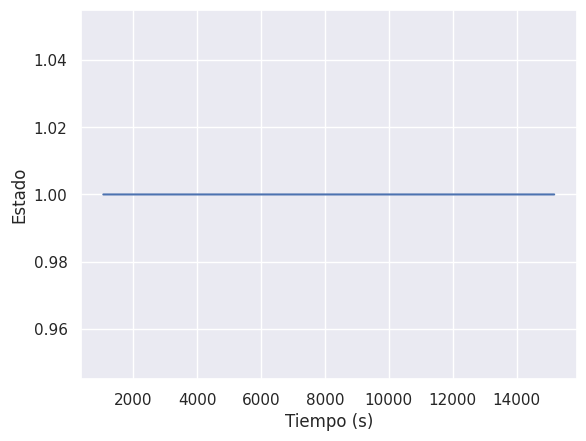

In [ ]:
plt.plot(df["State"])
plt.xlabel("Tiempo (s)")
plt.ylabel("Estado")
plt.show()

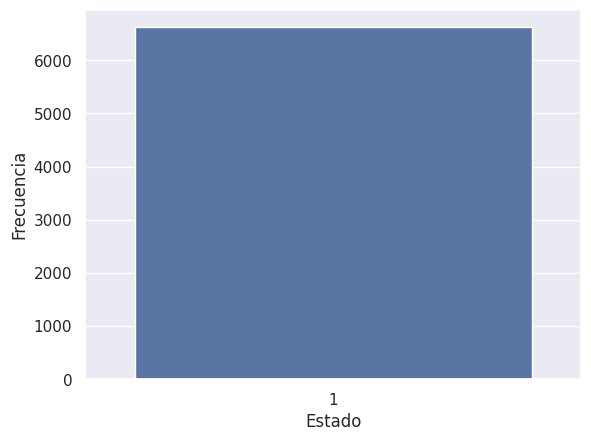

In [ ]:
ax = sns.countplot(x=df['State'])
ax.set(xlabel="Estado", ylabel="Frecuencia")
plt.show()

###Estado de carga

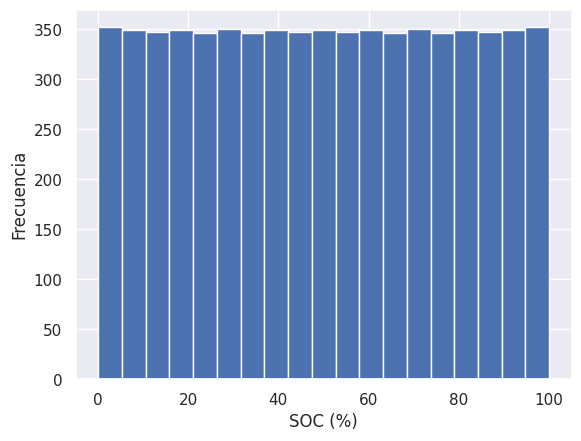

In [ ]:
plt.hist(df["SOC"], bins="auto")
plt.xlabel("SOC (%)")
plt.ylabel("Frecuencia")
plt.show()

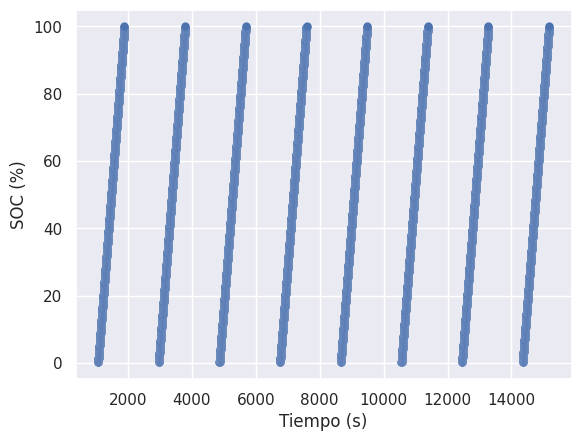

In [ ]:
sns.scatterplot(x=df.index, y=df["SOC"], linewidth=0.05)
plt.xlabel("Tiempo (s)")
plt.ylabel("SOC (%)")
plt.show()

##Matriz de correlación
Después de analizar pormenorizadamente cada variable por separado, procedemos a analizar la correlación entre variables.
Las filas o columnas que no aparecen en la matriz se debe a que su valor es constante.

<Axes: >

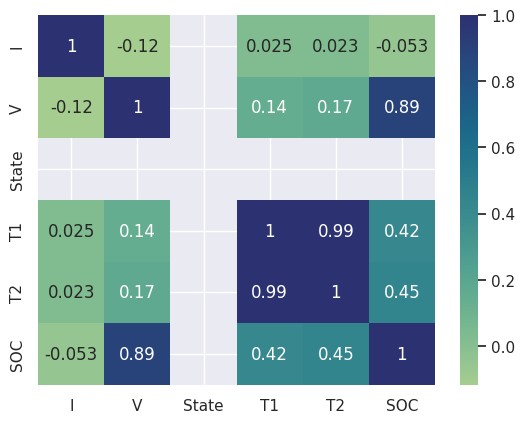

In [ ]:
sns.heatmap(df.corr(), annot=True, cmap="crest")

##Análisis bivariado
Analizaremos en gráficas las correlaciones encontradas en la matriz anterior.

###Estado de carga frente a tensión

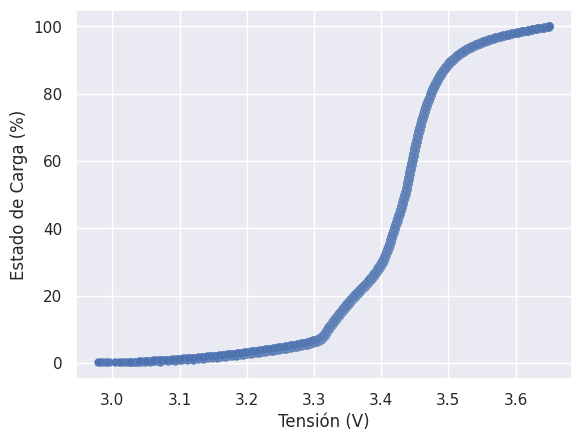

In [ ]:
sns.scatterplot(x=df["V"], y=df["SOC"], linewidth=0.05)
plt.xlabel("Tensión (V)")
plt.ylabel("Estado de Carga (%)")
plt.show()

###Estado de carga frente a temperatura

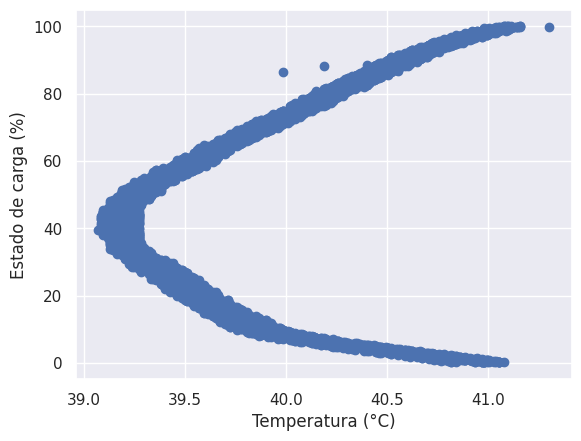

In [ ]:
plt.scatter(df["T1"], df["SOC"])
plt.xlabel("Temperatura (°C)")
plt.ylabel("Estado de carga (%)")
#plt.title("Estado de carga en función de la temperatura")
plt.show()

###Temperatura 2 frente a temperatura 1

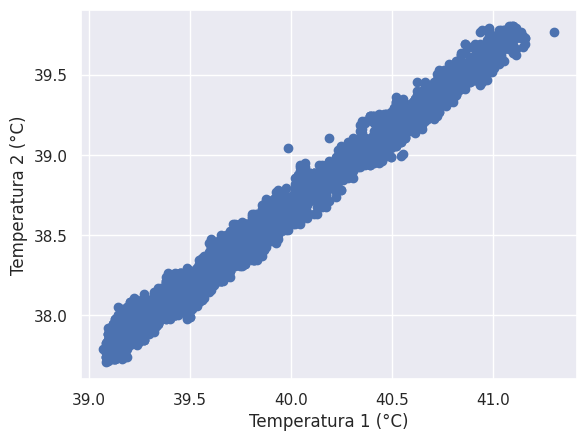

In [ ]:
plt.scatter(df["T1"], df["T2"])
plt.xlabel("Temperatura 1 (°C)")
plt.ylabel("Temperatura 2 (°C)")
#plt.title("Temperatura 2 en función de la temperatura 1")
plt.show()